In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# Wczytanie zbioru danych IRIS oraz podzielenie go na atrybuty i przypisane klasy
iris = datasets.load_iris()
X = iris.data[:]
y = iris.target

In [44]:
# Podział zbioru na PU- 80% oraz PT- 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# Liczba klasyfikatorów do baggingu
M = [1,2,5,10,20,50]
# Listy na wartości błednych klasyfikacji
tree_false = []
lda_false = []

for m in M:
    #  bagging oparte o domyślny klasyfikator drzew decyzyjnych
    tree_bag = BaggingClassifier(n_estimators=m)
    tree_bag.fit(X_train, y_train)
    tree_predictions = tree_bag.predict(X_test)
    # Błedne klasyfikacja to suma wszystkich wartości z macierzy pomyłek - suma wszystkich wartośći na diagonali (prawidłowe klasyfikacje)
    tree_false.append(confusion_matrix(y_test, tree_predictions).sum() - confusion_matrix(y_test, tree_predictions).diagonal().sum())
    
    #  bagging oparte o klasyfikator lda
    lda_bag = BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),n_estimators=m)
    lda_bag.fit(X_train, y_train)
    lda_predictions = lda_bag.predict(X_test)
    lda_false.append(confusion_matrix(y_test, lda_predictions).sum() - confusion_matrix(y_test, lda_predictions).diagonal().sum())

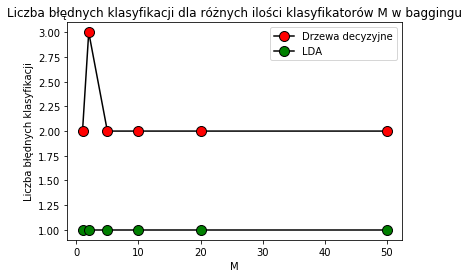

In [46]:
# wykresy

fig, ax = plt.subplots()
ax.plot(M,tree_false,color='black', linestyle='-', marker='o',markerfacecolor='red', markersize=10, label="Drzewa decyzyjne")
ax.plot(M,lda_false,color='black', linestyle='-', marker='o',markerfacecolor='g', markersize=10, label="LDA")
ax.set_title('Liczba błędnych klasyfikacji dla różnych ilości klasyfikatorów M w baggingu')
ax.set_xlabel('M')
ax.set_ylabel('Liczba błędnych klasyfikacji')
ax.legend()

plt.show()

#### Na powyższym wykresie widać, że w przypadku zarówno baggingu opartego o drzewa decyzyjna jak i LDA, liczba błędnych klasyfikacji jest bardzo mała i ilość zastosowanych klasyfikatorów M nie ma wpływu na jakość klasyfikatorów w przypadku danych ze zbioru IRIS.